In [ ]:
!pip install cartopy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 84.0 MB/s eta 0:00:00


#**Path taken by birds along the journey**

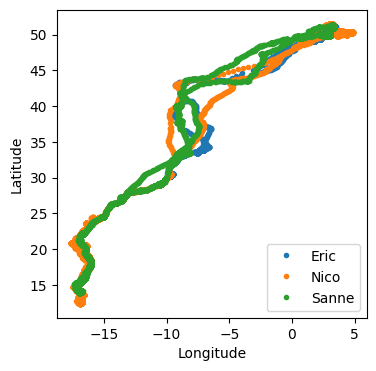

In [ ]:
birddata = pd.read_csv("/content/drive/My Drive/BDA Project data/bird_tracking.csv")
bird_names = pd.unique(birddata.bird_name)

plt.figure(figsize = (4,4))
for bird_name in bird_names:

    # storing the indices of the bird Eric
    ix = birddata.bird_name == bird_name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y,".", label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.show()

#**Tracking the speed pattern of birds**

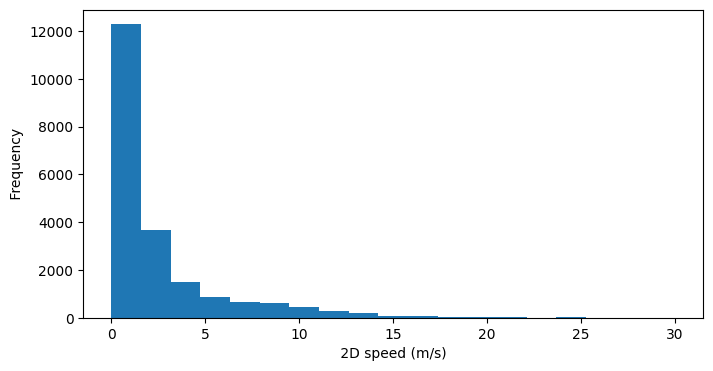

In [ ]:
plt.figure(figsize = (8,4))
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins = np.linspace(0,30,20))
plt.xlabel(" 2D speed (m/s) ")
plt.ylabel(" Frequency ")
plt.show()

#**Tracking time taken to cover distances**

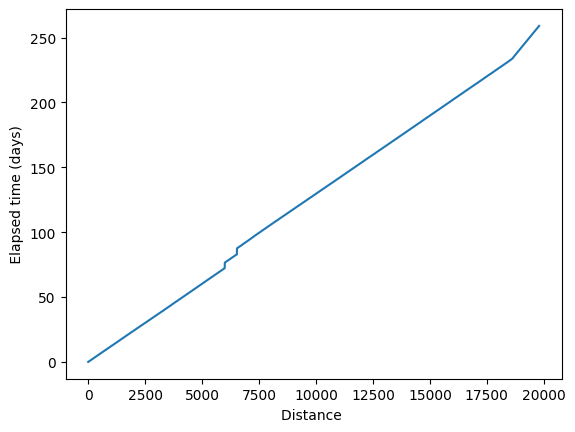

In [ ]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)

times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time-times.iloc[0] for time in times]

plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))
plt.xlabel("Distance ")
plt.ylabel(" Elapsed time (days) ")
plt.show()

#**Daily mean speed**

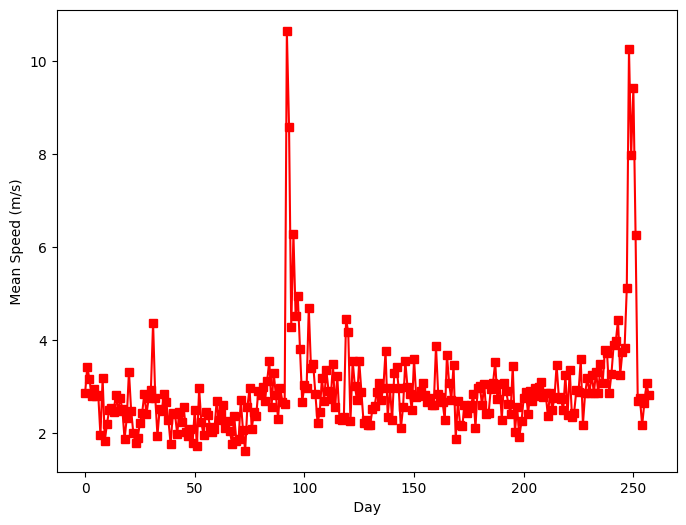

In [ ]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)

data =  birddata[birddata.bird_name == "Nico"]
times = data.timestamp
elapsed_time = [time-times.iloc[0] for time in times]
elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1)

next_day = 1
inds = []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d.iloc[inds]))
        next_day += 1
        inds = []

plt.figure(figsize = (8,6))
plt.plot(daily_mean_speed, "rs-")
plt.xlabel(" Day ")
plt.ylabel(" Mean Speed (m/s) ");
plt.show()

#**Plotting the trajectory of birds on a map**

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


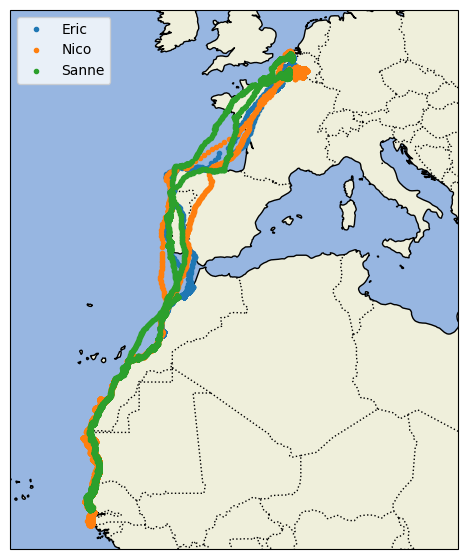

In [ ]:
# To move forward, we need to specify a
# specific projection that we're interested
# in using.
proj = ccrs.Mercator()

plt.figure(figsize=(7,7))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
for name in bird_names:
    ix = birddata['bird_name'] == name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x,y,'.', transform=ccrs.Geodetic(), label=name)
plt.legend(loc="upper left")
plt.show()